# Testes iniciais modelos de regressão

## Preparando o ambiente

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
SEED = 42
np.random.seed(SEED)

## Carregando os dados

In [3]:
dataset = pd.read_csv('../data/complete_dataset_region/complete_dataset_region.csv')
dataset.head()

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year
0,afghanistan,asia,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,2008
1,afghanistan,asia,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,2009
2,afghanistan,asia,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,2010
3,afghanistan,asia,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,2011
4,afghanistan,asia,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,2012


### Criando valor numérico para `region`

In [4]:
dataset['cat_region'] = pd.Categorical(dataset['region'])
dataset['cat_region'] = dataset['cat_region'].cat.codes
dataset.sample(5)

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year,cat_region
1005,lithuania,baltics,5.065825,10.085495,0.881811,64.500000,0.519352,-0.274880,0.962167,0.473150,0.272029,2010,1
1078,malta,western europe,6.154718,10.370396,0.922640,71.720001,0.881922,0.295860,0.652986,0.736184,0.339703,2011,10
67,australia,oceania,7.285391,10.702894,0.965276,71.720001,0.890682,0.347052,0.512578,0.826251,0.215351,2007,8
867,jordan,near east,5.171953,9.237214,0.840379,65.599998,0.692227,-0.116707,0.744979,0.684084,0.286033,2013,5
650,guatemala,latin amer. and carib,5.901429,8.849806,0.830442,60.740002,0.663382,0.172222,0.706096,0.818015,0.287082,2006,4


In [40]:
dataset['cat_country'] = pd.Categorical(dataset['country'])
dataset['cat_country'] = dataset['cat_country'].cat.codes

In [5]:
dataset.corr()

,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year,cat_region
score,1.000000,0.786760,0.710903,0.742423,0.524903,0.171968,-0.423622,0.526402,-0.305731,0.037531,0.059246
gdp,0.786760,1.000000,0.689782,0.834704,0.362880,-0.013398,-0.339782,0.299136,-0.224299,0.074857,-0.051085
social_support,0.710903,0.689782,1.000000,0.620191,0.412178,0.049919,-0.220744,0.429108,-0.403003,-0.006371,-0.008218
hle,0.742423,0.834704,0.620191,1.000000,0.388563,0.007027,-0.320664,0.309012,-0.147952,0.165953,-0.158477
freedom,0.524903,0.362880,0.412178,0.388563,1.000000,0.305791,-0.472828,0.602394,-0.267733,0.227725,0.060306
generosity,0.171968,-0.013398,0.049919,0.007027,0.305791,1.000000,-0.278279,0.334181,-0.077491,-0.036023,0.057679
corruption,-0.423622,-0.339782,-0.220744,-0.320664,-0.472828,-0.278279,1.000000,-0.285842,0.259155,-0.074125,-0.252090
positive_affect,0.526402,0.299136,0.429108,0.309012,0.602394,0.334181,-0.285842,1.000000,-0.372828,-0.001139,0.075334
negative_affect,-0.305731,-0.224299,-0.403003,-0.147952,-0.267733,-0.077491,0.259155,-0.372828,1.000000,0.209917,0.038011
year,0.037531,0.074857,-0.006371,0.165953,0.227725,-0.036023,-0.074125,-0.001139,0.209917,1.000000,0.038731


Note que a região possui uma influência consideravelmente pequena na previsão.

### Separação simples de treino e teste

In [36]:
columns_to_drop = ['country', 'region', 'score', 'year']

In [28]:
X = dataset.drop(columns_to_drop, axis=1)
y = dataset['score']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

## Treinamento inicial de modelos

Esses treinamentos não envolvem nenhum tipo de normalização dos dados, apenas um teste de seus comportamentos ante os dados.

### Modelos lineares

In [29]:
LinearRegression().fit(x_train, y_train).score(x_test, y_test)

0.7597245065421693

In [30]:
ElasticNetCV(random_state=SEED).fit(x_train, y_train).score(x_test, y_test)

0.7389577436494875

In [31]:
BayesianRidge().fit(x_train, y_train).score(x_test, y_test)

0.7596930087390796

### Modelos não lineares

In [32]:
SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1).fit(x_train, y_train).score(x_test, y_test)

0.8332804348483454

In [33]:
KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train).score(x_test, y_test)

0.8203747399398431

In [34]:
RandomForestRegressor(random_state=SEED).fit(x_train, y_train).score(x_test, y_test)

0.8755589847463452

In [35]:
DecisionTreeRegressor(random_state=SEED).fit(x_train, y_train).score(x_test, y_test)

0.795308117918332

O melhor modelo identificado foi o `RandomForestRegressor`. Uma análise melhor precisa ser feita para identificar se ele não está gerando overfitting.

## Análise do `RandomForestRegressor`

In [14]:
RandomForestRegressor(random_state=SEED).fit(X, y).score(X, y)

0.9848642589540146

Ainda que não gere um ajuste perfeto, o modelo está indicando um possível _overfitting_.

### Validando com 2021

In [20]:
until_2020 = dataset.query('year <= 2020')
X = until_2020.drop(columns_to_drop, axis=1)
y = until_2020['score']
since_2021 = dataset.query('year > 2020')
X_test = since_2021.drop(columns_to_drop, axis=1)
y_test = since_2021['score']

RandomForestRegressor(random_state=SEED).fit(X, y).score(X_test, y_test)

0.9565904206660386

In [21]:
predictions = RandomForestRegressor(random_state=SEED).fit(X, y).predict(X_test)
result = pd.DataFrame([predictions, X_test['gdp']]).T.rename(columns={0: 'score', 1: 'gdp'})

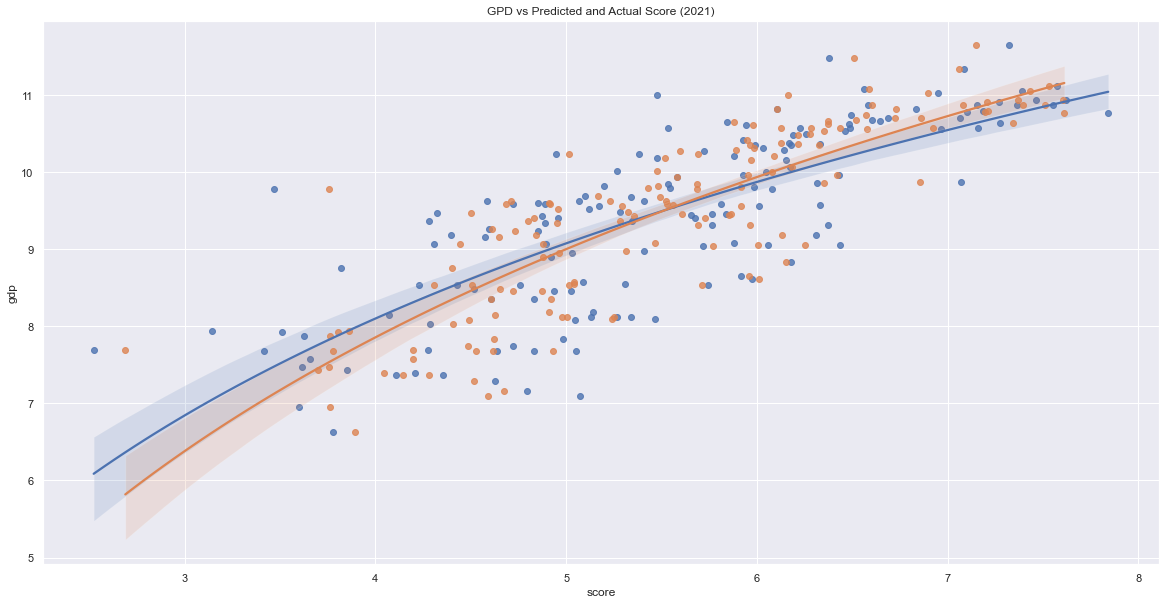

In [22]:
sns.set(rc={'figure.figsize':(20,10)})
sns.regplot(x='score', y='gdp', data=since_2021, label='Actual', logx=True)
sns.regplot(x='score', y='gdp', data=result, label='Predicted', logx=True)
plt.title('GPD vs Predicted and Actual Score (2021)')
plt.show()

Note que a variação está maior para scores menores, mas que em grande parte as curvas são muito parecidas. É preciso lembrar que não é apenas o GDP que é levado em consideração aqui.

### Erro por ano

In [23]:
current_year = dataset['year'].min()
last_year = dataset['year'].max()
years = list(range(current_year, last_year+1))

In [24]:
results = []
for year in years:
    to_train = dataset.query(f'year != {year}')
    to_test = dataset.query(f'year == {year}')
    X = to_train.drop(columns_to_drop, axis=1)
    y = to_train['score']
    X_test = to_test.drop(columns_to_drop, axis=1)
    y_test = to_test['score']
    score = RandomForestRegressor(random_state=SEED).fit(X, y).score(X_test, y_test)
    results.append({
        'year': year,
        'score': score
    }) 

results = pd.DataFrame(results) 
results    

,year,score
0,2005,0.693772
1,2006,0.854160
2,2007,0.844878
3,2008,0.889624
4,2009,0.818805
5,2010,0.899019
6,2011,0.861856
7,2012,0.908532
8,2013,0.888487
9,2014,0.885670


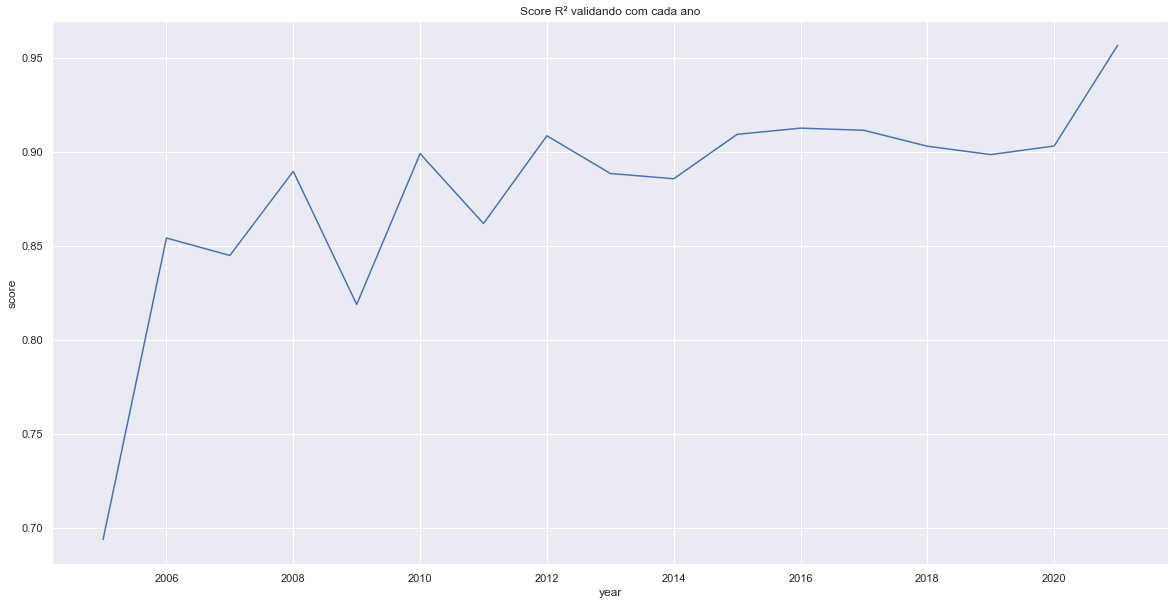

In [25]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x='year', y='score', data=results)
plt.title('Score R² validando com cada ano')
plt.show()

### Erro por região do mundo

In [26]:
regions = dataset['region'].unique()
results = []
for region in regions:
    to_train = dataset[dataset['region'] != region]
    to_test = dataset[dataset['region'] == region]
    print(f'Region: {region}, training size: {len(to_train)}, test size: {len(to_test)}')
    X = to_train.drop(['country', 'region', 'score','year', 'cat_region'], axis=1)
    y = to_train['score']
    X_test = to_test.drop(['country', 'region', 'score','year', 'cat_region'], axis=1)
    y_test = to_test['score']
    score = RandomForestRegressor(random_state=SEED).fit(X, y).score(X_test, y_test)
    results.append({
        'region': region,
        'score': score
    })
results = pd.DataFrame(results)
results

Region: asia, training size: 1777, test size: 321
Region: eastern europe, training size: 1902, test size: 196
Region: northern africa, training size: 2042, test size: 56
Region: sub-saharan africa, training size: 1635, test size: 463
Region: latin amer. and carib, training size: 1789, test size: 309
Region: c.w. of ind. states, training size: 1916, test size: 182
Region: oceania, training size: 2068, test size: 30
Region: western europe, training size: 1806, test size: 292
Region: near east, training size: 1927, test size: 171
Region: northern america, training size: 2066, test size: 32
Region: baltics, training size: 2052, test size: 46


,region,score
0,asia,0.114177
1,eastern europe,0.397033
2,northern africa,0.185726
3,sub-saharan africa,-0.151735
4,latin amer. and carib,-0.193013
5,c.w. of ind. states,0.138716
6,oceania,-6.759025
7,western europe,0.565792
8,near east,0.703304
9,northern america,-0.322600


A ausência da região do mundo impactou bastante o score e treinar sem aquela região trouxe baixos scores na validação com a mesma. Isso significa que exista uma importância da região.